# Import the required libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

# To get the dataset

In [45]:
data=pd.read_csv(r"C:\Users\HP\Downloads\NetflixDataset.csv")

In [46]:
## To display first five rows of dataset

data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [51]:
data.shape

(7789, 11)

In [52]:
data.columns

Index(['showID', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'ReleaseDate', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

# to get numerical stats 

In [53]:
data.describe()

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


# to get information about columns,Dtype,mem usage

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# to check duplicate records in my dataset

In [43]:
data.duplicated().sum()

2

In [44]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


# to remove duplicate values

In [45]:
data.drop_duplicates()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# to check null values

In [46]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

# to get graphical representation of null values

<AxesSubplot:>

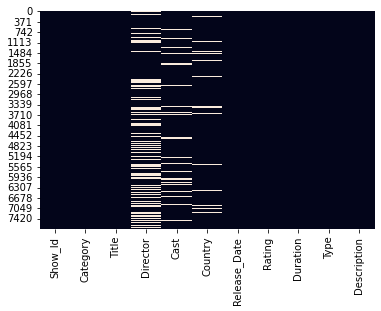

In [47]:
sns.heatmap(data.isnull(),cbar=False)

In [ ]:
1. null values present in director,cast & country columns
2. in director column there are maximum null values present and minimun in Ratings column

# to drop the null values from data set

In [54]:
data.dropna(how='any',inplace=True)

In [55]:
data.isnull().sum()

showID         0
Category       0
Title          0
Director       0
Cast           0
Country        0
ReleaseDate    0
Rating         0
Duration       0
Type           0
Description    0
dtype: int64

# to change the column names

In [56]:
data=data.rename (columns={'Show_Id':'showID','Release_Date':'ReleaseDate'})

In [57]:
data.columns

Index(['showID', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'ReleaseDate', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

# to know in which year highest number of Tv shows and movies released

In [58]:
data.dtypes

showID         object
Category       object
Title          object
Director       object
Cast           object
Country        object
ReleaseDate    object
Rating         object
Duration       object
Type           object
Description    object
dtype: object

In [59]:
data['Date']=pd.to_datetime(data['ReleaseDate'])

In [20]:
data.head()

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [21]:
data.dtypes

showID                 object
Category               object
Title                  object
Director               object
Cast                   object
Country                object
ReleaseDate            object
Rating                 object
Duration               object
Type                   object
Description            object
Date           datetime64[ns]
dtype: object

In [60]:
data['Date'].dt.year.value_counts()

2019    1338
2020    1230
2018    1115
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: Date, dtype: int64

<AxesSubplot:>

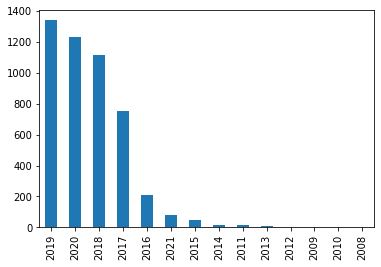

In [61]:
data['Date'].dt.year.value_counts().plot(kind='bar')

In [ ]:
1. above gragh shows in 2019 maximum number of tv shows and movies were released.
2. in 2010 only one tv show and movie were released.

# what is show id and director of 'The Lost Okoroshi'

In [25]:
 data[data['Title'].isin(['The Lost Okoroshi'])]

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date
4839,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,2020-09-04
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,2020-09-04


In [ ]:
1. Show id  of the movie is s6621
2. Director of movie is Abba T Makama

# to get the count values of Tv shows and Movies and also represent it graphically

In [62]:
data.head()

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [63]:
data.groupby('Category').Category.count()

Category
Movie      5379
TV Show    2410
Name: Category, dtype: int64

C:\Users\HP\.conda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Category', ylabel='count'>

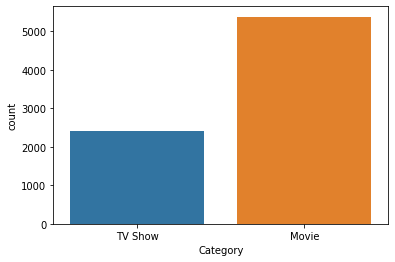

In [64]:
sns.countplot(data['Category'])

In [ ]:
1. number of Tv shows is less than movies.
2. count of Tv shows=2410
3. count of movies= 5379

In [ ]:
## show the movies that were released in year 2016

In [ ]:
1. first create new column of year from 'Date' column using dt.year function
2. then filter the movies and 2016

In [62]:
data['year']=data['Date'].dt.year

In [66]:
data.head()

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [25]:
data[(data['Category']=='Movie') & (data['year']==2016)]

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date,year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,2016-06-30,2016.0
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,2016-12-01,2016.0
59,s60,Movie,1000 Rupee Note,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",India,"December 1, 2016",TV-14,89 min,"Dramas, International Movies",After randomly receiving a handsome political ...,2016-12-01,2016.0
62,s63,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,2016-08-13,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,s7714,Movie,Yo-Kai Watch: The Movie,Mark Risley,"Johnny Yong Bosch, Joey D'Auria, Alicyn Packar...","Japan, United States","December 1, 2016",TV-Y7,96 min,"Anime Features, Children & Family Movies",Nate's special Yo-Kai Watch is missing. He tra...,2016-12-01,2016.0
7716,s7715,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...,2016-12-02,2016.0
7728,s7727,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",2016-07-01,2016.0
7739,s7738,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a...",2016-11-01,2016.0


# to get the only Tv shows released in Hong Kong

In [82]:
data[(data['Category']=='TV Show') & (data['Country']=='Hong Kong')]

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date,year
2797,s2798,TV Show,Hong Kong West Side Stories,NaN,"Louis Cheung, Myolie Wu, Justin Cheung, Brian ...",Hong Kong,"April 30, 2019",TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",The intimate lives of young men and women from...,2019-04-30,2019.0
4566,s4567,TV Show,OCTB,NaN,"Jordan Chan, Justin Cheung, Kwok-Kwan Chan, Sa...",Hong Kong,"February 5, 2018",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An undercover detective crosses paths with fam...,2018-02-05,2018.0
5529,s5529,TV Show,Sexy Central,NaN,"Jeana Ho Pui-yu, Joyce Cheng, Ava Liu, Shiga L...",Hong Kong,"July 20, 2019",TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In the bustling center of Hong Kong, five youn...",2019-07-20,2019.0


In [81]:
data[(data['Category']=='TV Show') & (data['Country']=='Hong Kong')] ['Title']

2797    Hong Kong West Side Stories
4566                           OCTB
5529                   Sexy Central
Name: Title, dtype: object

# List all the Horror Movies

In [5]:
data[(data['Category']=='Movie') & (data['Type']=='Horror Movies')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
261,s262,Movie,A.M.I.,Rusty Nixon,"Debs Howard, Philip Granger, Sam Robert Muik, ...",Canada,"October 1, 2020",TV-MA,77 min,Horror Movies,"After losing her mother, a teenage girl bonds ..."
417,s418,Movie,All the Boys Love Mandy Lane,Jonathan Levine,"Anson Mount, Edwin Hodge, Michael Welch, Brook...",United States,"July 3, 2018",R,91 min,Horror Movies,During a weekend excursion to a secluded ranch...
1551,s1552,Movie,Cult of Chucky,Don Mancini,"Fiona Dourif, Michael Therriault, Adam Hurtig,...",United States,"October 3, 2017",R,90 min,Horror Movies,Following a string of murders in the asylum wh...
1654,s1655,Movie,Deadcon,Caryn Waechter,"Lauren Elizabeth, Claudia Sulewski, Keith Mach...",United States,"January 16, 2020",TV-14,78 min,Horror Movies,"A group of uber-popular, social media influenc..."
1671,s1672,Movie,Death House,Harrison Smith,"Cody Longo, Cortney Palm, Adrienne Barbeau, Mi...",United States,"May 5, 2019",R,88 min,Horror Movies,Two federal agents battle through an army of r...
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand","January 16, 2021",R,94 min,Horror Movies,"With no memory of the previous night, a vacati..."
1811,s1812,Movie,Don't Be Afraid of the Dark,Troy Nixey,"Katie Holmes, Guy Pearce, Bailee Madison, Jack...","United States, Australia, Mexico","November 2, 2019",R,99 min,Horror Movies,Young Sally Hurst discovers she isn't alone in...
1976,s1977,Movie,Eli,Ciarán Foy,"Charlie Shotwell, Lili Taylor, Kelly Reilly, M...",United States,"October 18, 2019",TV-MA,98 min,Horror Movies,"With his desperate parents in tow, an 11-year-..."
2104,s2105,Movie,Family Blood,Sonny Mallhi,"James Ransone, Vinessa Shaw, Ajiona Alexus, Co...",United States,"May 5, 2018",TV-MA,92 min,Horror Movies,A former addict moves to a new city with her c...
2165,s2166,Movie,Final Destination 3,James Wong,"Mary Elizabeth Winstead, Ryan Merriman, Kris L...","United States, Germany","January 1, 2020",R,93 min,Horror Movies,When a girl prevents her premonition of a dead...


# To know in how many movies Tom Cruise was cast

In [6]:
 data[(data['Category']=='Movie') & (data['Cast']== 'Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


# check how many different ratings are there in given dataset

In [7]:
data['Rating'].nunique()

14

In [8]:
data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# To know how many Tv show got the 'UR'rating after year 2017

In [10]:
data[(data['Category']== 'Movie') & (data['Rating']=='UR')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2484,s2485,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","October 1, 2019",UR,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
2953,s2954,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...
5523,s5523,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
5574,s5574,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",UR,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow..."
7730,s7729,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...


In [27]:
data[(data['Category']== 'Movie') & (data['Rating']=='UR') & (data['year'] > 2017)]

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date,year
2484,s2485,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","October 1, 2019",UR,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ...",2019-10-01,2019.0
2953,s2954,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...,2019-06-06,2019.0
5574,s5574,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",UR,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",2019-05-15,2019.0
7730,s7729,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,2019-09-01,2019.0


In [ ]:
## Find which country has maximum TV shows

In [36]:
tvshowdata = data[data['Category']=='TV Show']

In [37]:
tvshowdata.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [38]:
tvshowdata.Country.value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

In [39]:
tvshowdata.Country.value_counts().iplot(kind='bar')

In [ ]:
1. it shows United States have maximum number of Tv shows followed by United Kingdom,japan and south korea.

In [64]:
data.sort_values(by='year', ascending=False)

,showID,Category,Title,Director,Cast,Country,ReleaseDate,Rating,Duration,Type,Description,Date,year
1739,s1740,Movie,Dhobi Ghat (Mumbai Diaries),Kiran Rao,"Aamir Khan, Monica Dogra, Kriti Malhotra, Prat...",India,"January 10, 2021",TV-MA,102 min,"Dramas, International Movies","In this intimate drama, circumstances draw tog...",2021-01-10,2021
1690,s1691,Movie,Delhi Belly,Abhinay Deo,"Imran Khan, Vir Das, Kunaal Roy Kapur, Poorna ...",India,"January 10, 2021",TV-MA,101 min,"Action & Adventure, Comedies, International Mo...",Three flatmates get involved in the shady busi...,2021-01-10,2021
2413,s2414,Movie,Gimme Shelter,Ron Krauss,"Vanessa Hudgens, James Earl Jones, Rosario Daw...",United States,"January 1, 2021",PG-13,101 min,"Dramas, Independent Movies","After running away from her abusive mother, a ...",2021-01-01,2021
6289,s6289,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,2021-01-01,2021
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",2021-01-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,"October 1, 2011",TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,2011
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009


# What is maximum duration of movie on netflix

In [71]:
moviedata= data[data['Category']=='Movie']

In [72]:
moviedata.Duration.unique()

array(['93 min', '78 min', '80 min', '123 min', '95 min', '119 min',
       '118 min', '143 min', '103 min', '89 min', '91 min', '149 min',
       '144 min', '124 min', '110 min', '128 min', '117 min', '100 min',
       '99 min', '102 min', '104 min', '105 min', '125 min', '81 min',
       '97 min', '106 min', '107 min', '87 min', '109 min', '101 min',
       '90 min', '113 min', '114 min', '130 min', '94 min', '140 min',
       '135 min', '82 min', '70 min', '92 min', '164 min', '83 min',
       '116 min', '84 min', '86 min', '120 min', '96 min', '126 min',
       '75 min', '129 min', '77 min', '137 min', '148 min', '121 min',
       '122 min', '176 min', '85 min', '22 min', '68 min', '111 min',
       '29 min', '142 min', '168 min', '59 min', '108 min', '44 min',
       '26 min', '156 min', '98 min', '57 min', '150 min', '133 min',
       '115 min', '154 min', '127 min', '146 min', '136 min', '88 min',
       '131 min', '24 min', '112 min', '74 min', '63 min', '174 min',
       '60 m

In [76]:
moviedata.Duration.value_counts()

93 min     121
94 min     120
90 min     114
95 min     111
97 min     108
          ... 
200 min      1
196 min      1
214 min      1
193 min      1
191 min      1
Name: Duration, Length: 186, dtype: int64

In [77]:
moviedata.Duration.value_counts().iplot(kind='bar')

In [ ]:
1. maximum duration of movie is 253 min and there is only one movie of this duration.
2.minimum duration of movie is 14 min.